# Dataset

link to the dataset : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Objectives

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# 1. Data preprocessing

In this first part, every column is studied one by one to check:
* outliers 
* missing values
    * check if it's relevant to drop rows or columns
* object column (categorical / ordinal / binary column?)

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [106]:
df=pd.read_csv('data/bank.csv', sep=';')

In [107]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [109]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 1.1 object columns

### 1.1.1 Categorical columns

In [110]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [111]:
df.job.value_counts()
#38/4521 unknown => drop the 38 rows
df = df.drop(df[df['job']=='unknown'].index).reset_index(drop=True)

In [112]:
listdummies=[]
listdummies.append('job')
#get dummies to do

In [113]:
df.marital.unique()
listdummies.append('marital')

In [114]:
df.education.value_counts()

secondary    2298
tertiary     1342
primary       671
unknown       172
Name: education, dtype: int64

In [115]:
listdummies.append('education')
#172 unknown => drop the 172 rows
df = df.drop(df[df['education']=='unknown'].index).reset_index(drop=True)

In [116]:
#contact: contact communication type
df.contact.value_counts(normalize = True)
#drop col 1/3 of unknown
df.drop('contact', axis=1, inplace=True)

In [117]:
#poutcome: outcome of the previous marketing campaign
#df[df.previous>0].poutcome.value_counts(normalize=True)
df.poutcome.value_counts()

unknown    3536
failure     470
other       188
success     117
Name: poutcome, dtype: int64

In [118]:
#the only relevant information here is success & failure 
"""dici={'success':1,'failure':-1,'other':0, 'unknown':0}
df.poutcome=df.poutcome.map(dici)"""
listdummies.append('poutcome')

In this file, we test our model with 'get_dummies'

In [119]:
listdummies

['job', 'marital', 'education', 'poutcome']

In [120]:
df=pd.concat([df,pd.get_dummies(df.job)], axis=1)
df=pd.concat([df,pd.get_dummies(df.marital)], axis=1)
df=pd.concat([df,pd.get_dummies(df.education)], axis=1)
df=pd.concat([df,pd.get_dummies(df.poutcome)], axis=1)
df.drop(listdummies, axis=1, inplace=True)


In [121]:
df.drop(['unknown'], axis=1, inplace=True)

In [122]:
"""dicit={'married':2, 'single':1, 'divorced':3}
df.marital=df.marital.map(dicit)

dicti={'primary':1, 'secondary':2, 'tertiary':3}
df.education=df.education.map(dicti)

dici={'unemployed':1, 'services':2, 'management':3, 'blue-collar':4,
       'self-employed':5, 'technician':6, 'entrepreneur':7, 'admin.':8, 'student':9,
       'housemaid':10, 'retired':11}

df.job=df.job.map(dici)"""

"dicit={'married':2, 'single':1, 'divorced':3}\ndf.marital=df.marital.map(dicit)\n\ndicti={'primary':1, 'secondary':2, 'tertiary':3}\ndf.education=df.education.map(dicti)\n\ndici={'unemployed':1, 'services':2, 'management':3, 'blue-collar':4,\n       'self-employed':5, 'technician':6, 'entrepreneur':7, 'admin.':8, 'student':9,\n       'housemaid':10, 'retired':11}\n\ndf.job=df.job.map(dici)"

### 1.1.2 Binary columns

In [123]:
#default=has credit in default?
df.default.value_counts()

no     4238
yes      73
Name: default, dtype: int64

In [124]:
#replace string by numerical value
dict={'no':0,'yes':1}
df.default=df.default.map(dict)

In [125]:
#housing: has housing loan?
df.housing=df.housing.map(dict)

In [126]:
#loan: has personal loan?
df.loan=df.loan.map(dict)

In [127]:
df.y=df.y.map(dict)

### 1.1.3 Numerical Columns

In [128]:
#average yearly balance, in euros
df.balance.describe()

count     4311.000000
mean      1410.662723
std       3015.650889
min      -3313.000000
25%         66.500000
50%        440.000000
75%       1456.000000
max      71188.000000
Name: balance, dtype: float64

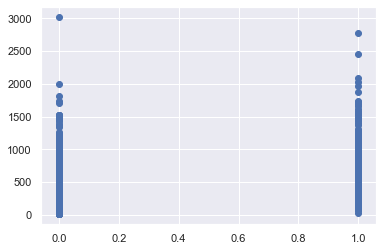

In [129]:
#drop duration, duration is unknown before the phone call. It is possible that the longer the call lasts the more likely the output is yes
plt.scatter(df.y, df.duration)
df.drop('duration', axis=1, inplace= True)

In [130]:
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
df.campaign.describe()

count    4311.000000
mean        2.805382
std         3.134040
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

In [131]:
np.percentile(df.campaign, 99)

16.0

In [132]:
df[df.campaign>np.percentile(df.campaign, 99)]
#strange, outliers? to check with models ==> after checking, drop some possible outliers doesn't improve models 

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,unemployed,divorced,married,single,primary,secondary,tertiary,failure,other,success
37,23,0,363,1,0,30,may,18,-1,0,...,0,0,0,1,0,0,1,0,0,0
284,38,0,593,1,1,24,jul,24,-1,0,...,0,0,1,0,0,1,0,0,0,0
434,44,0,795,0,0,28,aug,24,-1,0,...,0,0,1,0,0,0,1,0,0,0
492,36,0,-381,1,0,31,jul,29,-1,0,...,0,0,1,0,0,0,1,0,0,0
530,42,0,1932,1,0,16,may,32,-1,0,...,0,0,1,0,0,0,1,0,0,0
791,35,0,714,1,0,26,aug,22,-1,0,...,0,0,0,1,0,0,1,0,0,0
903,40,0,109,0,0,20,jun,22,-1,0,...,0,0,1,0,0,1,0,0,0,0
1030,26,0,454,1,1,23,may,18,-1,0,...,1,0,1,0,0,0,1,0,0,0
1305,53,0,2627,1,1,16,jun,30,-1,0,...,0,0,1,0,0,0,1,0,0,0
1369,33,0,13494,1,0,20,jun,25,-1,0,...,0,0,0,1,0,1,0,0,0,0


In [133]:
#number of days that passed by after the client was last contacted from a previous campaign
df.pdays.describe()
#-1 means client was not previously contacted
#make another boolean columns 'pcontacted' =previous contact before or none (1 or 0)
#put 0 instead of -1 in the column

count    4311.000000
mean       39.741591
std       100.048485
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

In [134]:
df['pcontacted']=df.pdays.map(lambda x : 0 if x==-1 else 1)
df.pdays=df.pdays.map(lambda x : 0 if x==-1 else x)

In [136]:
#number of contacts performed before this campaign and for this client (numeric)
df.previous.describe()

count    4311.000000
mean        0.544885
std         1.705530
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64

In [139]:
df.drop(['month', 'day'], axis=1, inplace=True)

# 2. Modelling

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import r2_score

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4311 non-null   int64
 1   default        4311 non-null   int64
 2   balance        4311 non-null   int64
 3   housing        4311 non-null   int64
 4   loan           4311 non-null   int64
 5   campaign       4311 non-null   int64
 6   pdays          4311 non-null   int64
 7   previous       4311 non-null   int64
 8   y              4311 non-null   int64
 9   admin.         4311 non-null   uint8
 10  blue-collar    4311 non-null   uint8
 11  entrepreneur   4311 non-null   uint8
 12  housemaid      4311 non-null   uint8
 13  management     4311 non-null   uint8
 14  retired        4311 non-null   uint8
 15  self-employed  4311 non-null   uint8
 16  services       4311 non-null   uint8
 17  student        4311 non-null   uint8
 18  technician     4311 non-null   uint8
 19  unempl

In [150]:
X_train, X_test,y_train,y_test = train_test_split(df.drop('y',axis=1), \
                                                  df.y, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=df.y)

In [151]:
#keep all the measure in measures
measures={}

### KNN

In [152]:
knn=KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['KNN']=[acc1, rec1, pre1, f11]

array([[740,  23],
       [ 88,  12]], dtype=int64)

Accuracy 0.8713789107763615
Recall 0.12
Precision 0.34285714285714286
F1 0.17777777777777776


### LogisticRegression

In [153]:
lr=LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

conf1=confusion_matrix(y_test, y_pred)
acc1=accuracy_score(y_test, y_pred)
rec1=recall_score(y_test, y_pred)
pre1=precision_score(y_test, y_pred)
f11=f1_score(y_test, y_pred)
display(conf1)
print('Accuracy:', acc1)
print('Recall:', rec1)
print('Precision:', pre1)
print('F1:', f11)

measures['LogisticRegression']=[acc1, rec1, pre1, f11]

array([[544, 219],
       [ 40,  60]], dtype=int64)

Accuracy: 0.6998841251448435
Recall: 0.6
Precision: 0.21505376344086022
F1: 0.31662269129287596


### SVC

In [154]:
sv=SVC()
sv.fit(X_train, y_train)
y_pred3=sv.predict(X_test)
#display(confusion_matrix(y_pred3, y_test))
#display(accuracy_score(y_pred3, y_test))
conf1=confusion_matrix(y_test, y_pred3)
acc1=accuracy_score(y_test, y_pred3)
rec1=recall_score(y_test, y_pred3)
pre1=precision_score(y_test, y_pred3)
f11=f1_score(y_test, y_pred3)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['SVC']=[acc1, rec1, pre1, f11]

C:\Users\auror\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[763,   0],
       [100,   0]], dtype=int64)

Accuracy 0.884125144843569
Recall 0.0
Precision 0.0
F1 0.0


### GaussianNB

In [155]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred4=nb.predict(X_test)
conf1=confusion_matrix(y_test, y_pred4)
acc1=accuracy_score(y_test, y_pred4)
rec1=recall_score(y_test, y_pred4)
pre1=precision_score(y_test, y_pred4)
f11=f1_score(y_test, y_pred4)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['GaussianNB']=[acc1, rec1, pre1, f11]

array([[679,  84],
       [ 59,  41]], dtype=int64)

Accuracy 0.8342989571263036
Recall 0.41
Precision 0.328
F1 0.3644444444444444


### DecisionTreeClassifier

In [156]:
model1=DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['Decision Tree Classifier']=[acc1, rec1, pre1, f11]

array([[673,  90],
       [ 70,  30]], dtype=int64)

Accuracy 0.8146002317497103
Recall 0.3
Precision 0.25
F1 0.2727272727272727


### Random Forest

In [157]:
model1=RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['Random Forest']=[acc1, rec1, pre1, f11]

array([[749,  14],
       [ 87,  13]], dtype=int64)

Accuracy 0.8829663962920047
Recall 0.13
Precision 0.48148148148148145
F1 0.20472440944881887


### Random Forest balanced

In [158]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['Random Forest Balanced']=[acc1, rec1, pre1, f11]

array([[752,  11],
       [ 88,  12]], dtype=int64)

Accuracy 0.8852838933951332
Recall 0.12
Precision 0.5217391304347826
F1 0.19512195121951217


### XGBoost

In [159]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['XGBoost']=[acc1, rec1, pre1, f11]

array([[745,  18],
       [ 81,  19]], dtype=int64)

Accuracy 0.8852838933951332
Recall 0.19
Precision 0.5135135135135135
F1 0.2773722627737226


### AdaBoost

In [160]:
model1=AdaBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

"""
sans enlever 

Accuracy 0.8933951332560834
Recall 0.2
Precision 0.625
F1 0.30303030303030304

"""

measures['AdaBoost']=[acc1, rec1, pre1, f11]

array([[752,  11],
       [ 80,  20]], dtype=int64)

Accuracy 0.8945538818076477
Recall 0.2
Precision 0.6451612903225806
F1 0.30534351145038163


### CatBoost

In [161]:
model1=CatBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test,  y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test,  y_pred1)
f11=f1_score(y_test,  y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['CatBoost']=[acc1, rec1, pre1, f11]

Learning rate set to 0.017477
0:	learn: 0.6779414	total: 3.94ms	remaining: 3.94s
1:	learn: 0.6631918	total: 6.08ms	remaining: 3.03s
2:	learn: 0.6502858	total: 8.39ms	remaining: 2.79s
3:	learn: 0.6374222	total: 10.6ms	remaining: 2.65s
4:	learn: 0.6244521	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6118859	total: 16.4ms	remaining: 2.71s
6:	learn: 0.6001093	total: 18.9ms	remaining: 2.68s
7:	learn: 0.5885021	total: 21.2ms	remaining: 2.63s
8:	learn: 0.5779069	total: 23.6ms	remaining: 2.59s
9:	learn: 0.5681873	total: 25.8ms	remaining: 2.56s
10:	learn: 0.5583393	total: 28.1ms	remaining: 2.53s
11:	learn: 0.5488952	total: 31ms	remaining: 2.56s
12:	learn: 0.5394922	total: 33.9ms	remaining: 2.58s
13:	learn: 0.5301863	total: 36.7ms	remaining: 2.59s
14:	learn: 0.5217101	total: 39.3ms	remaining: 2.58s
15:	learn: 0.5137000	total: 41.9ms	remaining: 2.58s
16:	learn: 0.5057857	total: 44.7ms	remaining: 2.59s
17:	learn: 0.4980697	total: 47.4ms	remaining: 2.58s
18:	learn: 0.4910709	total: 50.1ms	remaining: 

190:	learn: 0.2985989	total: 486ms	remaining: 2.06s
191:	learn: 0.2984813	total: 488ms	remaining: 2.06s
192:	learn: 0.2983506	total: 491ms	remaining: 2.05s
193:	learn: 0.2980735	total: 493ms	remaining: 2.05s
194:	learn: 0.2978133	total: 496ms	remaining: 2.05s
195:	learn: 0.2976788	total: 498ms	remaining: 2.04s
196:	learn: 0.2975213	total: 501ms	remaining: 2.04s
197:	learn: 0.2973977	total: 504ms	remaining: 2.04s
198:	learn: 0.2971913	total: 507ms	remaining: 2.04s
199:	learn: 0.2970434	total: 509ms	remaining: 2.04s
200:	learn: 0.2969117	total: 512ms	remaining: 2.03s
201:	learn: 0.2967750	total: 514ms	remaining: 2.03s
202:	learn: 0.2966779	total: 516ms	remaining: 2.02s
203:	learn: 0.2965134	total: 518ms	remaining: 2.02s
204:	learn: 0.2962465	total: 521ms	remaining: 2.02s
205:	learn: 0.2960648	total: 523ms	remaining: 2.02s
206:	learn: 0.2959304	total: 525ms	remaining: 2.01s
207:	learn: 0.2956803	total: 528ms	remaining: 2.01s
208:	learn: 0.2955542	total: 531ms	remaining: 2.01s
209:	learn: 

360:	learn: 0.2769482	total: 910ms	remaining: 1.61s
361:	learn: 0.2768675	total: 913ms	remaining: 1.61s
362:	learn: 0.2768082	total: 915ms	remaining: 1.61s
363:	learn: 0.2766544	total: 918ms	remaining: 1.6s
364:	learn: 0.2764399	total: 920ms	remaining: 1.6s
365:	learn: 0.2762553	total: 923ms	remaining: 1.6s
366:	learn: 0.2761556	total: 925ms	remaining: 1.59s
367:	learn: 0.2760228	total: 928ms	remaining: 1.59s
368:	learn: 0.2759321	total: 930ms	remaining: 1.59s
369:	learn: 0.2758540	total: 932ms	remaining: 1.59s
370:	learn: 0.2757302	total: 935ms	remaining: 1.58s
371:	learn: 0.2756581	total: 937ms	remaining: 1.58s
372:	learn: 0.2754411	total: 939ms	remaining: 1.58s
373:	learn: 0.2753480	total: 941ms	remaining: 1.57s
374:	learn: 0.2751762	total: 944ms	remaining: 1.57s
375:	learn: 0.2751072	total: 946ms	remaining: 1.57s
376:	learn: 0.2750563	total: 949ms	remaining: 1.57s
377:	learn: 0.2750177	total: 951ms	remaining: 1.56s
378:	learn: 0.2748693	total: 954ms	remaining: 1.56s
379:	learn: 0.2

549:	learn: 0.2546243	total: 1.38s	remaining: 1.13s
550:	learn: 0.2545358	total: 1.38s	remaining: 1.12s
551:	learn: 0.2544192	total: 1.38s	remaining: 1.12s
552:	learn: 0.2543801	total: 1.39s	remaining: 1.12s
553:	learn: 0.2542611	total: 1.39s	remaining: 1.12s
554:	learn: 0.2541679	total: 1.39s	remaining: 1.11s
555:	learn: 0.2540623	total: 1.39s	remaining: 1.11s
556:	learn: 0.2539950	total: 1.4s	remaining: 1.11s
557:	learn: 0.2538796	total: 1.4s	remaining: 1.11s
558:	learn: 0.2536986	total: 1.4s	remaining: 1.1s
559:	learn: 0.2535211	total: 1.4s	remaining: 1.1s
560:	learn: 0.2534033	total: 1.41s	remaining: 1.1s
561:	learn: 0.2532709	total: 1.41s	remaining: 1.1s
562:	learn: 0.2531089	total: 1.41s	remaining: 1.09s
563:	learn: 0.2530204	total: 1.41s	remaining: 1.09s
564:	learn: 0.2529213	total: 1.42s	remaining: 1.09s
565:	learn: 0.2528099	total: 1.42s	remaining: 1.09s
566:	learn: 0.2527188	total: 1.42s	remaining: 1.08s
567:	learn: 0.2525839	total: 1.42s	remaining: 1.08s
568:	learn: 0.252515

725:	learn: 0.2356290	total: 1.81s	remaining: 683ms
726:	learn: 0.2355479	total: 1.81s	remaining: 681ms
727:	learn: 0.2354727	total: 1.82s	remaining: 679ms
728:	learn: 0.2353344	total: 1.82s	remaining: 676ms
729:	learn: 0.2352231	total: 1.82s	remaining: 674ms
730:	learn: 0.2351523	total: 1.82s	remaining: 671ms
731:	learn: 0.2350733	total: 1.82s	remaining: 669ms
732:	learn: 0.2350560	total: 1.83s	remaining: 666ms
733:	learn: 0.2348998	total: 1.83s	remaining: 664ms
734:	learn: 0.2347933	total: 1.83s	remaining: 661ms
735:	learn: 0.2346972	total: 1.84s	remaining: 659ms
736:	learn: 0.2346160	total: 1.84s	remaining: 657ms
737:	learn: 0.2344213	total: 1.84s	remaining: 654ms
738:	learn: 0.2342220	total: 1.84s	remaining: 652ms
739:	learn: 0.2341315	total: 1.85s	remaining: 649ms
740:	learn: 0.2340191	total: 1.85s	remaining: 647ms
741:	learn: 0.2339117	total: 1.85s	remaining: 644ms
742:	learn: 0.2338161	total: 1.85s	remaining: 641ms
743:	learn: 0.2337725	total: 1.86s	remaining: 639ms
744:	learn: 

919:	learn: 0.2170095	total: 2.29s	remaining: 199ms
920:	learn: 0.2168603	total: 2.29s	remaining: 197ms
921:	learn: 0.2168274	total: 2.29s	remaining: 194ms
922:	learn: 0.2167795	total: 2.3s	remaining: 192ms
923:	learn: 0.2166914	total: 2.3s	remaining: 189ms
924:	learn: 0.2165925	total: 2.3s	remaining: 187ms
925:	learn: 0.2164770	total: 2.31s	remaining: 184ms
926:	learn: 0.2164742	total: 2.31s	remaining: 182ms
927:	learn: 0.2163927	total: 2.31s	remaining: 179ms
928:	learn: 0.2162489	total: 2.31s	remaining: 177ms
929:	learn: 0.2161121	total: 2.32s	remaining: 174ms
930:	learn: 0.2160154	total: 2.32s	remaining: 172ms
931:	learn: 0.2159335	total: 2.32s	remaining: 169ms
932:	learn: 0.2157505	total: 2.32s	remaining: 167ms
933:	learn: 0.2156961	total: 2.33s	remaining: 164ms
934:	learn: 0.2156153	total: 2.33s	remaining: 162ms
935:	learn: 0.2155165	total: 2.33s	remaining: 159ms
936:	learn: 0.2154147	total: 2.33s	remaining: 157ms
937:	learn: 0.2153048	total: 2.33s	remaining: 154ms
938:	learn: 0.2

array([[752,  11],
       [ 79,  21]], dtype=int64)

Accuracy 0.895712630359212
Recall 0.21
Precision 0.65625
F1 0.31818181818181823


array([[752,  11],
       [ 80,  20]], dtype=int64)

Accuracy 0.8945538818076477
Recall 0.2
Precision 0.6451612903225806
F1 0.30534351145038163


__The metric to check is the recall, less false negative the better. So the model with best performance is LogisticRegression.__

# 3. Features selection

In [162]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [163]:
X=df.drop('y', axis=1)
y=df.y

### RFE

In [164]:
estimator=LogisticRegression(max_iter=10000, class_weight='balanced')
selector_w1=RFE(estimator, n_features_to_select=12)
selector_w1.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [165]:
X.columns[selector_w1.support_]

Index(['default', 'housing', 'loan', 'blue-collar', 'retired', 'student',
       'unemployed', 'married', 'tertiary', 'failure', 'success',
       'pcontacted'],
      dtype='object')

In [166]:
df2=X[X.columns[selector_w1.support_]]

In [167]:
X_train, X_test,y_train,y_test = train_test_split(df2, \
                                                  df.y, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=df.y)

In [168]:
model1=LogisticRegression(max_iter=10000, class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['LogisticRegression_RFE']=[acc1, rec1, pre1, f11]

array([[598, 165],
       [ 47,  53]], dtype=int64)

Accuracy 0.7543453070683661
Recall 0.53
Precision 0.24311926605504589
F1 0.33333333333333337


### SFS 

In [169]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [170]:
estimator=LogisticRegression(max_iter=10000, class_weight='balanced')
sfs1=sfs(estimator, 
         k_features=6,
         forward=True,
         floating=False)

In [171]:
sfs1.fit(X,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LogisticRegression(C=1.0,
                                                       class_weight='balanced',
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=10000,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
          

In [172]:
sfs1.get_metric_dict()

{1: {'feature_idx': (27,),
  'cv_scores': array([0.89107764, 0.89443155, 0.89443155, 0.887471  , 0.89327146]),
  'avg_score': 0.892136640919686,
  'feature_names': ('success',),
  'ci_bound': 0.003386481481523359,
  'std_dev': 0.002634797642531465,
  'std_err': 0.0013173988212657323},
 2: {'feature_idx': (4, 27),
  'cv_scores': array([0.89107764, 0.89443155, 0.89443155, 0.887471  , 0.89327146]),
  'avg_score': 0.892136640919686,
  'feature_names': ('loan', 'success'),
  'ci_bound': 0.003386481481523359,
  'std_dev': 0.002634797642531465,
  'std_err': 0.0013173988212657323},
 3: {'feature_idx': (4, 8, 27),
  'cv_scores': array([0.89107764, 0.89443155, 0.89443155, 0.887471  , 0.89327146]),
  'avg_score': 0.892136640919686,
  'feature_names': ('loan', 'admin.', 'success'),
  'ci_bound': 0.003386481481523359,
  'std_dev': 0.002634797642531465,
  'std_err': 0.0013173988212657323},
 4: {'feature_idx': (4, 8, 10, 27),
  'cv_scores': array([0.89107764, 0.89443155, 0.89443155, 0.887471  , 0.893

In [173]:
sfs1.k_feature_names_

('loan', 'admin.', 'entrepreneur', 'self-employed', 'services', 'success')

In [174]:
df_sfs=df[list(sfs1.k_feature_names_)]

In [175]:
X_train, X_test,y_train,y_test = train_test_split(df_sfs, \
                                                  df.y, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=df.y)

lr=LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)
conf1=confusion_matrix(y_test, y_pred2)
acc1=accuracy_score(y_test, y_pred2)
rec1=recall_score(y_test, y_pred2)
pre1=precision_score(y_test, y_pred2)
f11=f1_score(y_test, y_pred2)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['LogisticRegression_SFS']=[acc1, rec1, pre1, f11]

array([[725,  38],
       [ 82,  18]], dtype=int64)

Accuracy 0.8609501738122828
Recall 0.18
Precision 0.32142857142857145
F1 0.23076923076923075


### Ridge & Lasso

In [176]:
from sklearn.linear_model import RidgeCV, LassoCV

In [177]:
selector4=LassoCV()
selector4.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [178]:
print('best alpha is', selector4.alpha_) #alpha correspond au lambda de la formule, plus il est petit mieux c'est 

best alpha is 0.015775681701113518


In [179]:
coef = pd.Series(selector4.coef_, index=X.columns)

In [180]:
sns.set()

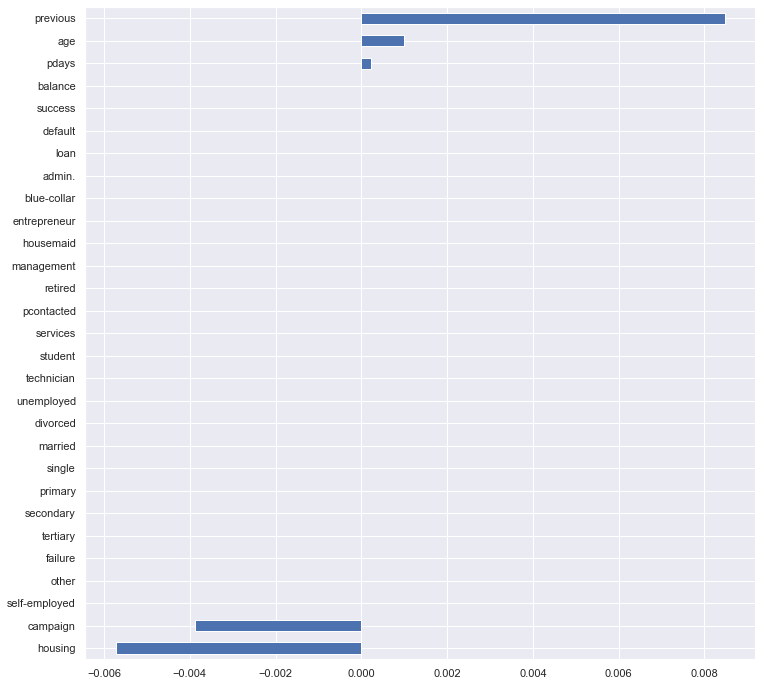

In [181]:
coef.sort_values().plot.barh(figsize=(12,12))

In [182]:
df_lasso=df[['previous', 'age', 'pdays', 'campaign', 'housing']]

X_train, X_test,y_train,y_test = train_test_split(df_lasso, \
                                                  df.y, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=df.y)

lr=LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)

conf1=confusion_matrix(y_test, y_pred2)
acc1=accuracy_score(y_test, y_pred2)
rec1=recall_score(y_test, y_pred2)
pre1=precision_score(y_test, y_pred2)
f11=f1_score(y_test, y_pred2)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['LogisticRegression_LassoCV']=[acc1, rec1, pre1, f11]

array([[435, 328],
       [ 33,  67]], dtype=int64)

Accuracy 0.5816917728852838
Recall 0.67
Precision 0.16962025316455695
F1 0.27070707070707073


In [183]:
selector5=RidgeCV()

In [184]:
selector5.fit(X,y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [185]:
print('best alpha is', selector5.alpha_) #alpha correspond au lambda de la formule, plus il est petit mieux c'est 

best alpha is 10.0


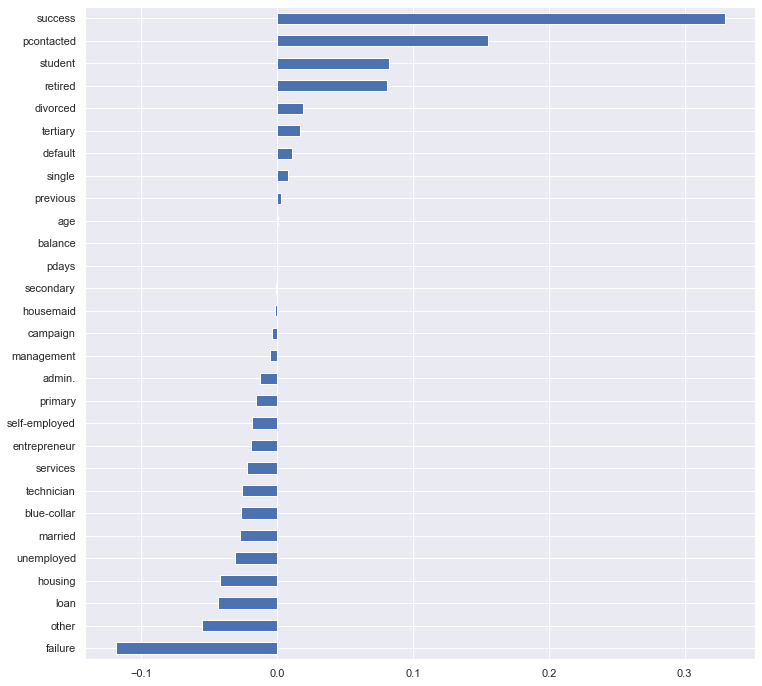

In [186]:
coef = pd.Series(selector5.coef_, index=X.columns)
coef.sort_values().plot.barh(figsize=(12,12))

In [187]:
df_ridge=df[['success', 'pcontacted', 'student','retired', 'divorced','tertiary','default', 'single', 'previous',
      'housemaid', 'campaign', 'management', 'admin.', 'primary', 'self-employed', 'entrepreneur', 'services', 
       'technician', 'blue-collar', 'married', 'unemployed', 'housing', 'loan', 'other', 'failure']]

In [188]:
X_train, X_test,y_train,y_test = train_test_split(df_ridge, \
                                                  df.y, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=df.y)

lr=LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)

conf1=confusion_matrix(y_test, y_pred2)
acc1=accuracy_score(y_test, y_pred2)
rec1=recall_score(y_test, y_pred2)
pre1=precision_score(y_test, y_pred2)
f11=f1_score(y_test, y_pred2)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

measures['LogisticRegression_RidgeCV']=[acc1, rec1, pre1, f11]

array([[559, 204],
       [ 43,  57]], dtype=int64)

Accuracy 0.7137891077636153
Recall 0.57
Precision 0.21839080459770116
F1 0.31578947368421056


# 4. To conclude 

In [198]:
#get the results in one dataframe
results = pd.DataFrame(measures).T
results.columns=['Accuracy', 'Recall', 'Precision', 'F1']
results.sort_values(by='Recall', ascending=False, inplace=True)
results

,Accuracy,Recall,Precision,F1
LogisticRegression_LassoCV,0.581692,0.67,0.169620,0.270707
LogisticRegression,0.699884,0.60,0.215054,0.316623
LogisticRegression_RidgeCV,0.713789,0.57,0.218391,0.315789
LogisticRegression_RFE,0.754345,0.53,0.243119,0.333333
GaussianNB,0.834299,0.41,0.328000,0.364444
Decision Tree Classifier,0.814600,0.30,0.250000,0.272727
AdaBoost,0.894554,0.20,0.645161,0.305344
CatBoost,0.894554,0.20,0.645161,0.305344
XGBoost,0.885284,0.19,0.513514,0.277372
LogisticRegression_SFS,0.860950,0.18,0.321429,0.230769


In [203]:
results.loc[['LogisticRegression_LassoCV','LogisticRegression', 'LogisticRegression_RidgeCV', 
         'LogisticRegression_RFE','LogisticRegression_SFS']]

,Accuracy,Recall,Precision,F1
LogisticRegression_LassoCV,0.581692,0.67,0.169620,0.270707
LogisticRegression,0.699884,0.60,0.215054,0.316623
LogisticRegression_RidgeCV,0.713789,0.57,0.218391,0.315789
LogisticRegression_RFE,0.754345,0.53,0.243119,0.333333
LogisticRegression_SFS,0.860950,0.18,0.321429,0.230769


__After training our data, and testing it, we can conclude that the Logistic Regression using feature selection with Lasso is the best model to predict wether a client will subscribe a term deposit or not.__